In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/gdrive') # 此處需要登入google帳號
# 獲取授權碼之後輸入即可連動雲端硬碟
data = pd.read_csv("/content/gdrive/My Drive/online.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import geopandas as gpd
europe = gpd.read_file("/content/gdrive/My Drive/Europe/Europe.shp")

In [3]:
europe.head()

,NAME,ORGN_NAME,geometry
0,Albania,Shqipëria,"MULTIPOLYGON (((19.50115 40.96230, 19.50563 40..."
1,Andorra,Andorra,"POLYGON ((1.43992 42.60649, 1.45041 42.60596, ..."
2,Austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252..."
3,Belgium,België / Belgique,"POLYGON ((5.00000 49.79374, 4.99724 49.79696, ..."
4,Bosnia Herzegovina,Bosna i Hercegovina,"POLYGON ((19.22947 43.53458, 19.22925 43.53597..."


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 
a=pd.DataFrame(pd.value_counts(data["Country"]))
a=a.reset_index()
a.columns=["NAME","count"]
a=a.set_index("NAME")
a.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,count
NAME,
United Kingdom,495441
Germany,9495
France,8557
EIRE,8196
Spain,2533


In [5]:
merged=europe.set_index('NAME').join(a)
merged.head()

,ORGN_NAME,geometry,count
NAME,,,
Albania,Shqipëria,"MULTIPOLYGON (((19.50115 40.96230, 19.50563 40...",NaN
Andorra,Andorra,"POLYGON ((1.43992 42.60649, 1.45041 42.60596, ...",NaN
Austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",401.0
Belgium,België / Belgique,"POLYGON ((5.00000 49.79374, 4.99724 49.79696, ...",2069.0
Bosnia Herzegovina,Bosna i Hercegovina,"POLYGON ((19.22947 43.53458, 19.22925 43.53597...",NaN


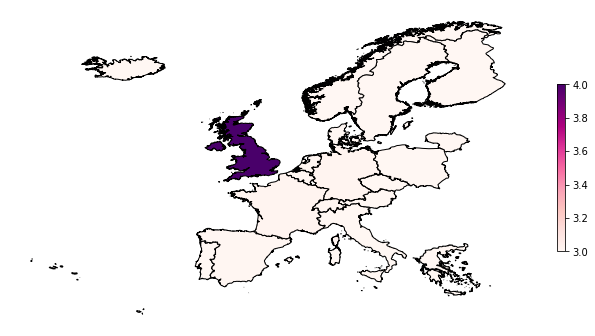

In [6]:
#主要客戶都在歐洲，所以只畫歐洲地圖
fig, ax = plt.subplots(1, figsize=(10, 8))
merged.plot(column='count', cmap='RdPu', linewidth=1, ax=ax, edgecolor='black')
ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='RdPu', norm=plt.Normalize(vmin=3, vmax=4))
sm._A = []
cbar = fig.colorbar(sm,fraction=0.015, pad=0.05)